In [ ]:
#例4.13

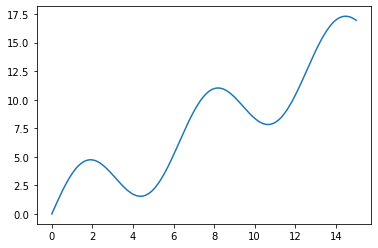

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin
def f(x):
    return x+3*np.sin(x)
x=np.linspace(0,15,200)
plt.plot(x,f(x))
plt.show()

In [2]:
#fmin(f,x_0),其中第二个参数x_0表示从x_0开始，找最近的极小值点
result=fmin(f,2)
result

Optimization terminated successfully.
         Current function value: 1.544125
         Iterations: 18
         Function evaluations: 36


array([4.37255859])

In [3]:
fmin(f,7)

Optimization terminated successfully.
         Current function value: 1.544125
         Iterations: 17
         Function evaluations: 34


array([4.37252197])

In [4]:
fmin(f,9)

Optimization terminated successfully.
         Current function value: 7.827310
         Iterations: 16
         Function evaluations: 32


array([10.65574951])

In [5]:
fmin(f,12)

Optimization terminated successfully.
         Current function value: 7.827310
         Iterations: 16
         Function evaluations: 32


array([10.65571289])

In [6]:
def f(x,get_min=1):
    return (x+3*np.sin(x))*get_min
#当需求极大值时,让参数get_min=-1,如下：
fmin(f,3,args=(-1,))

Optimization terminated successfully.
         Current function value: -4.739060
         Iterations: 16
         Function evaluations: 32


array([1.91066895])

In [7]:
from sympy import symbols,diff,solve
def f_min_max(f,x,scope=[-100,100]):
    #筛选出落在区间[-100,100]内的可疑极值点
    diff_1=f.diff(x)
    solves=solve(diff_1,x)  
    maybe_minORmax_point=[]
    for i in range(len(solves)):
        if solves[i]>scope[0] and solves[i]<scope[1]:
            #将导数为0的点添加至列表maybe_minORmax_point
            maybe_minORmax_point.append(solves[i])
    #从可疑极值点中挑选出极小值点，极大值点以及待确定点
    diff_2=diff_1.diff(x)
    min_points=[]
    max_points=[]
    not_sure_points=[]
    for i in range(len(maybe_minORmax_point)):
        if diff_2.subs(x,maybe_minORmax_point[i])>0: #如果二阶导数>0
            min_points.append((maybe_minORmax_point[i],f.subs(x,maybe_minORmax_point[i])))
        elif diff_2.subs(x,maybe_minORmax_point[i])<0: #如果二阶导数<0
            max_points.append((maybe_minORmax_point[i],f.subs(x,maybe_minORmax_point[i])))
        else: #如果二阶导数==0
            not_sure_points.append((maybe_minORmax_point[i],f.subs(x,maybe_minORmax_point[i])))
    #显示左端点函数值
    print('Left point:{}'.format((scope[0],f.subs(x,scope[0]))))
    #显示右端点函数值
    print('Right point:{}'.format((scope[1],f.subs(x,scope[1]))))
    print('Max points:{}'.format(max_points))
    print('Min points:{}'.format(min_points))
    print('Not sure points:{}'.format(not_sure_points))

In [ ]:
#例4.14

In [8]:
x=symbols('x',real=True)  #将x设置为实数非常必要！
f=(x**2-1)**3+1
f_min_max(f,x,scope=[-2,2])

Left point:(-2, 28)
Right point:(2, 28)
Max points:[]
Min points:[(0, 0)]
Not sure points:[(-1, 1), (1, 1)]


In [ ]:
#例4.15

In [9]:
x=symbols('x',real=True) 
y=(3*x**2+4*x+4)/(x**2+x+1)
f_min_max(y,x)

Left point:(-100, 29604/9901)
Right point:(100, 30404/10101)
Max points:[(0, 4)]
Min points:[(-2, 8/3)]
Not sure points:[]


In [10]:
from sympy import sin
x=symbols('x',real=True) 
f=x+3*sin(x)
f_min_max(f,x,scope=[0,15])

Left point:(0, 0)
Right point:(15, 3*sin(15) + 15)
Max points:[(acos(-1/3), acos(-1/3) + 2*sqrt(2))]
Min points:[(-acos(-1/3) + 2*pi, -2*sqrt(2) - acos(-1/3) + 2*pi)]
Not sure points:[]


In [11]:
solve(sin(x),x)

[0, pi]